In [1]:
import numpy as np
import matplotlib
from matplotlib import animation
from matplotlib import pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

# Initialize the environment

In [2]:
def render_env(env):
    frame = env.render(mode='rgb_array')
    plt.axis('off')
    plt.imshow(frame)
    return frame

In [3]:
env = Maze()

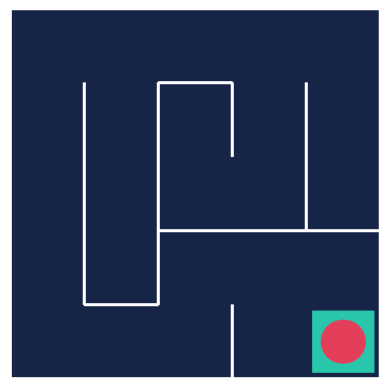

In [4]:
frame = render_env(env)

In [5]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


# Define value table Q(s, a)

### Create Q(s, a) tabl

In [6]:
action_values = np.full((5, 5, 4), -100)
action_values[4, 4, :] = 0.

### Plot Q(s, a)

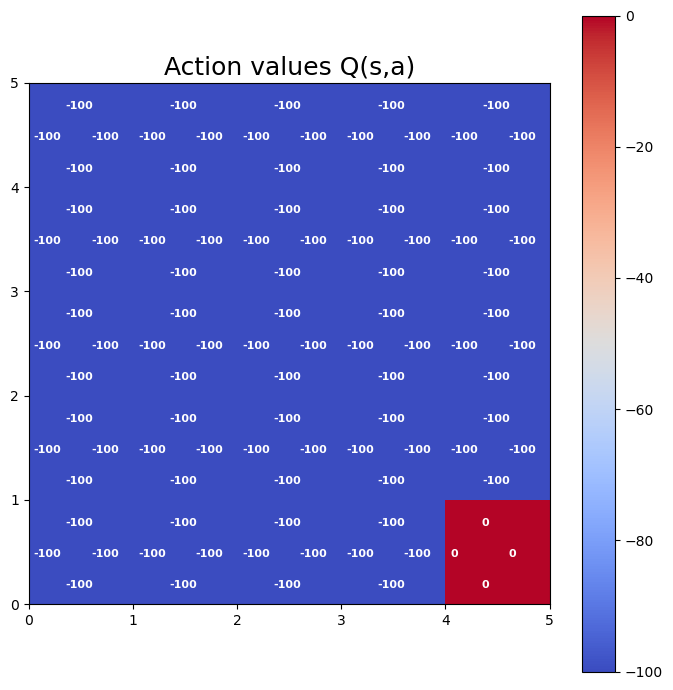

In [7]:
plot_action_values(action_values)

# Define the target policy

### Create the target policy

In [8]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

### Test the policy with state (0, 0)

In [9]:
action = target_policy((0, 0))
print(f"Action taken in state (0, 0): {action}")

Action taken in state (0, 0): 3


### Plot the policy

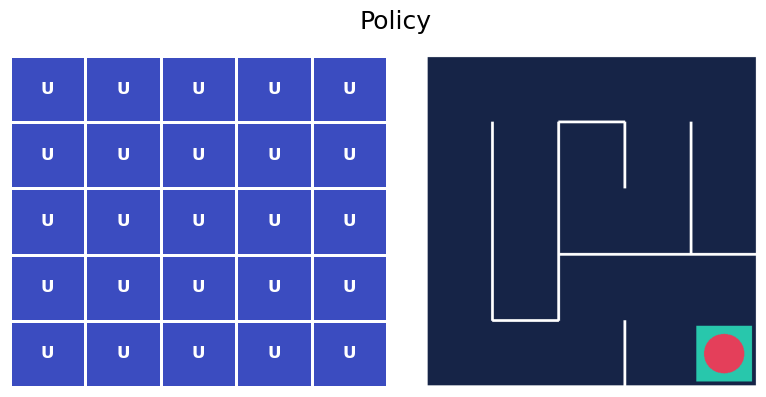

In [10]:
plot_policy(action_values, frame)

# Define the exploratory policy

### Create the policy

In [12]:
def exploratory_policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

### Test the policy with state (0, 0)

In [15]:
action = exploratory_policy((0, 0))
print(f"Action taken in state (0, 0): {action}")

Action taken in state (0, 0): 3


# Implement the algorithm

In [19]:
def off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes, gamma=0.99, epsilon=0.2):

    csa = np.zeros((5, 5, 4))

    for episode in range(1, episodes + 1):
        G = 0
        W = 1
        state = env.reset()
        done = False
        transitions = []

        while not done:
            action = exploratory_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state

        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            csa[state_t][action_t] += W
            qsa = action_values[state_t][action_t]
            action_values[state_t][action_t] += (W / csa[state_t][action_t]) * (G - qsa)

            if action_t != target_policy(state_t):
                break

            W = W * 1.0 / (1 - epsilon + epsilon / 4)

In [20]:
off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes=1000)

# Show results

### Show resuting value table Q(s, a)

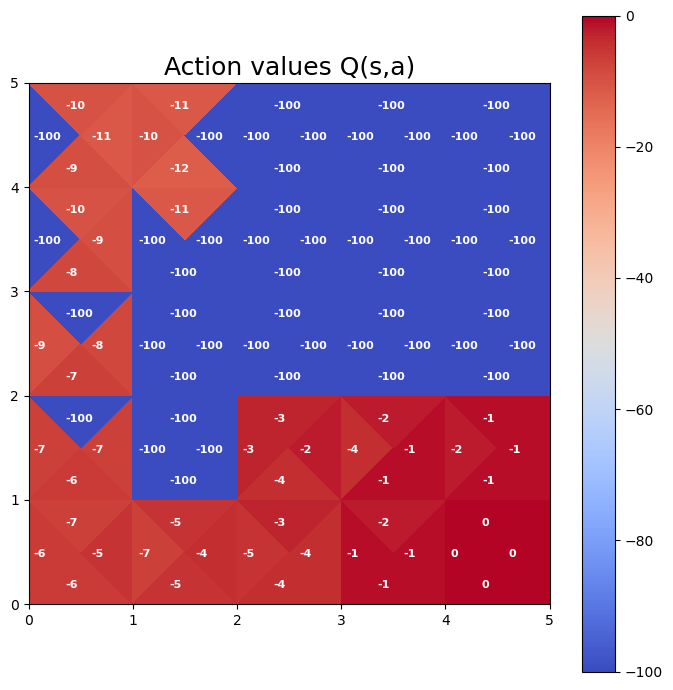

In [21]:
plot_action_values(action_values)

### Show resulting policy

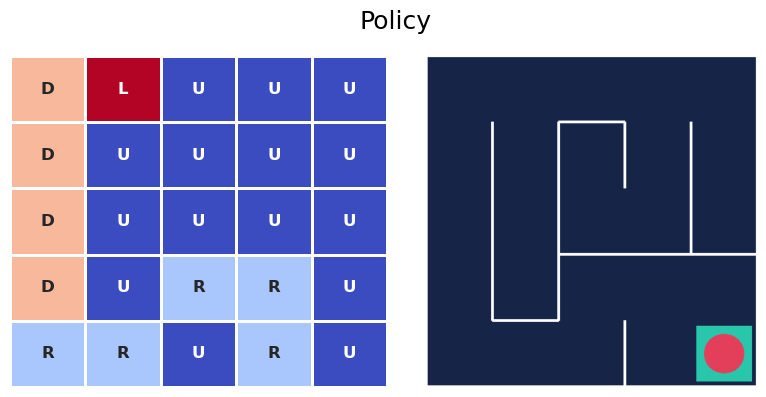

In [22]:
plot_policy(action_values, frame)

### Test the result agent

In [24]:
test_agent(env, target_policy, episodes=1)